In this script we look into the flares events and prep some routines to select only the available timestamps between te beginning and end of the flare

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
flares_path = 'flares.csv'
inventory_path = 'inventory.pkl'
df = pd.read_csv(flares_path)

In [3]:
df['start_time']

0      2010-06-12T00:30:00
1      2010-06-12T09:02:00
2      2010-06-13T05:30:00
3      2010-08-07T17:55:00
4      2010-08-15T18:23:00
              ...         
115    2011-06-14T21:36:00
116    2011-06-16T10:13:00
117    2011-06-21T01:22:00
118    2011-07-27T15:48:00
119    2011-07-28T02:19:00
Name: start_time, Length: 120, dtype: object

In [4]:
df['end_time']

0      2010-06-12T01:02:00
1      2010-06-12T09:22:00
2      2010-06-13T05:44:00
3      2010-08-07T18:47:00
4      2010-08-15T18:37:00
              ...         
115    2011-06-14T22:10:00
116    2011-06-16T10:29:00
117    2011-06-21T04:27:00
118    2011-07-27T16:22:00
119    2011-07-28T02:29:00
Name: end_time, Length: 120, dtype: object

For each flare we want to take images pre and fter the event

In [5]:
str_time = df['start_time'][0]

array([[<AxesSubplot:title={'center':'Time(min)'}>]], dtype=object)

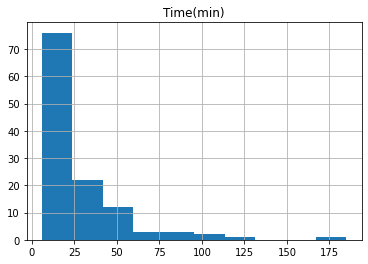

In [6]:
flares_duration = (pd.to_datetime(df['end_time']) - pd.to_datetime(df['start_time'])).dt.total_seconds()/60
pd.DataFrame(flares_duration, columns=['Time(min)']).hist()

Most of the flares last about 30min, we could take dates within 1h before the start date and 1 after, but some of them are much longer, better to be precise with end and start time

In [7]:
yr, mth, rest = str_time.split('-')
day, time  = rest.split('T')
hour, minus, _ = time.split(':')
print(yr, mth, day, hour, minus)

2010 06 12 00 30


In [8]:
df_inventory = pd.read_pickle(inventory_path)
df_inventory = df_inventory.reset_index(drop=True)

In [9]:
# bx, by, bz channels have different times
sel_channels = ['0094', '0131', '0171', '0193', '0211', '0304', '0335', '1600', '1700']
df_inventory = df_inventory[df_inventory.channel.isin(sel_channels)]

In [10]:
df_inventory['min'].values

array([ 0,  0,  0, ..., 54, 54, 54], dtype=uint8)

In [11]:
type(df_inventory['year'].values[0])

numpy.uint64

In [12]:
df_inventory

,year,month,day,hour,min,channel,file
3858,2010,5,13,0,0,0193,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/05/1...
3859,2010,5,13,0,0,0171,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/05/1...
3861,2010,5,13,0,0,0131,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/05/1...
3863,2010,5,13,0,0,0094,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/05/1...
3864,2010,5,13,0,0,1600,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/05/1...
...,...,...,...,...,...,...,...
7345135,2018,12,9,23,54,1600,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2018/12/0...
7345136,2018,12,9,23,54,1700,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2018/12/0...
7345137,2018,12,9,23,54,0094,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2018/12/0...
7345138,2018,12,9,23,54,0193,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2018/12/0...


In [13]:
set(df_inventory.channel.values)

{'0094', '0131', '0171', '0193', '0211', '0304', '0335', '1600', '1700'}

In [14]:
d_date= {'yr':'2010', 'month':'06', 'h':'12', 'm':'00', 'sec':'30'}
l_date = list(d_date.values())
print(l_date)
d = dt.datetime(*map(int, l_date))
print(d)
dpre = d - dt.timedelta(hours=0, minutes=30)
print(dpre)

['2010', '06', '12', '00', '30']
2010-06-12 00:30:00
2010-06-12 00:00:00


In [15]:
dpre.second

0

In [16]:
df_inventory[(df_inventory.year ==2010) & (df_inventory.month==6) & (df_inventory.day==12)]

,year,month,day,hour,min,channel,file
70634,2010,6,12,0,0,0131,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
70635,2010,6,12,0,0,0304,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
70636,2010,6,12,0,0,0193,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
70637,2010,6,12,0,0,1700,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
70638,2010,6,12,0,0,0094,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
...,...,...,...,...,...,...,...
73107,2010,6,12,23,54,0193,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
73108,2010,6,12,23,54,0304,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
73109,2010,6,12,23,54,0094,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...
73110,2010,6,12,23,54,1700,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...


In [36]:
def split_time(str_time):
    yr, mth, rest = str_time.split('-')
    day, time  = rest.split('T')
    hour, minus, _ = time.split(':')
    return {'y': yr, 'mt': mth, 'd':day, 'h':hour, 'm':minus}
    #yr_start, mth_start, day_start, hour_start, minus_start
    #yr_end, mth_end, day_end, hour_end, minus_end
    
def from_row_to_date(x):
    l_date = [x['year'], x['month'], x['day'], x['hour'], x['min'], 0]
    return dt.datetime(*map(int, l_date))

def nearest(items, pivot):
    def convert_nptime_to_datetime(x):
        return dt.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
    return min(items, key=lambda x: abs(convert_nptime_to_datetime(x) - pivot))
    
def find_closest_datetimes(start_time, end_time, sel_df):
    nearest_start_time = nearest(sel_df['date'].tolist(), start_time)
    # this is imperfect, we should look into the month, in case the event happens close to midnight
    nearest_end_time = nearest(sel_df['date'].tolist(), end_time)
    return nearest_start_time, nearest_end_time
    
def get_datetime(time, buffer_h, buffer_m):
    d_time = split_time(time)
    time = dt.datetime(*map(int, list(d_time.values())))
    time = time - dt.timedelta(hours=buffer_h, minutes=buffer_m)
    return time
    
def select_images_in_the_interval(start_time, end_time, df_inventory, buffer_h=1, buffer_m=0):
    first_datetime = get_datetime(start_time, buffer_h, buffer_m)
    last_datetime = get_datetime(end_time, buffer_h, buffer_m)
    # select all the times of that day
    sel_df = df_inventory[(df_inventory.year==first_datetime.year) 
                      & (df_inventory.month==first_datetime.month) 
                      & (df_inventory.day==first_datetime.day)]
    if df.shape[0]>0:
        # this operation is slow if applied to the full dataframe
        sel_df['date'] = sel_df.apply(from_row_to_date, axis=1)
        first_datetime, last_datetime = find_closest_datetimes(first_datetime, last_datetime, sel_df)
        sel_df = sel_df[(sel_df.date >=first_datetime) & (sel_df.date <=last_datetime)]
        return sel_df
    else:
        print('This day is not available')
        return pd.DataFrame(columns=df_inventory.columns)

In [38]:
print(df['start_time'][0], df['end_time'][0])
select_images_in_the_interval(df['start_time'][0], df['end_time'][0], df_inventory, buffer_h=1, buffer_m=0)

2010-06-12T00:30:00 2010-06-12T01:02:00


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,month,day,hour,min,channel,file,date
70583,2010,6,11,23,30,0193,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70584,2010,6,11,23,30,1700,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70585,2010,6,11,23,30,1600,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70586,2010,6,11,23,30,0171,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70587,2010,6,11,23,30,0094,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70588,2010,6,11,23,30,0304,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70589,2010,6,11,23,30,0211,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70590,2010,6,11,23,30,0335,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70591,2010,6,11,23,30,0131,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:30:00
70592,2010,6,11,23,36,0131,/fdl_sdo_data/SDOMLmm/fdl_sw/SDOMLmm/2010/06/1...,2010-06-11 23:36:00


Brilliant, it works. We can put this inside the DataSet class